<<LSTM 모형을 살펴 보자 >> 
https://www.bioinf.jku.at/publications/older/2604.pdf

1)Embedding  : 복수의 문장을 입력했을 때 , 문장의 단어를 벡터 표현으로 변환 한 다음 리턴해준다. 

2)GlobalAveragePooling1D  : Embedding에서 문장을 벡터로 리턴하게 되면 단어 벡터의 차원별로 평균을 리턴
                             각 문장의 특징을 압축한 데이터로 표현할 수 있다.  
 

tf.keras.layers.Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs
)

tf.keras.layers.GlobalAveragePooling1D(
    data_format='channels_last', **kwargs
)


![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)

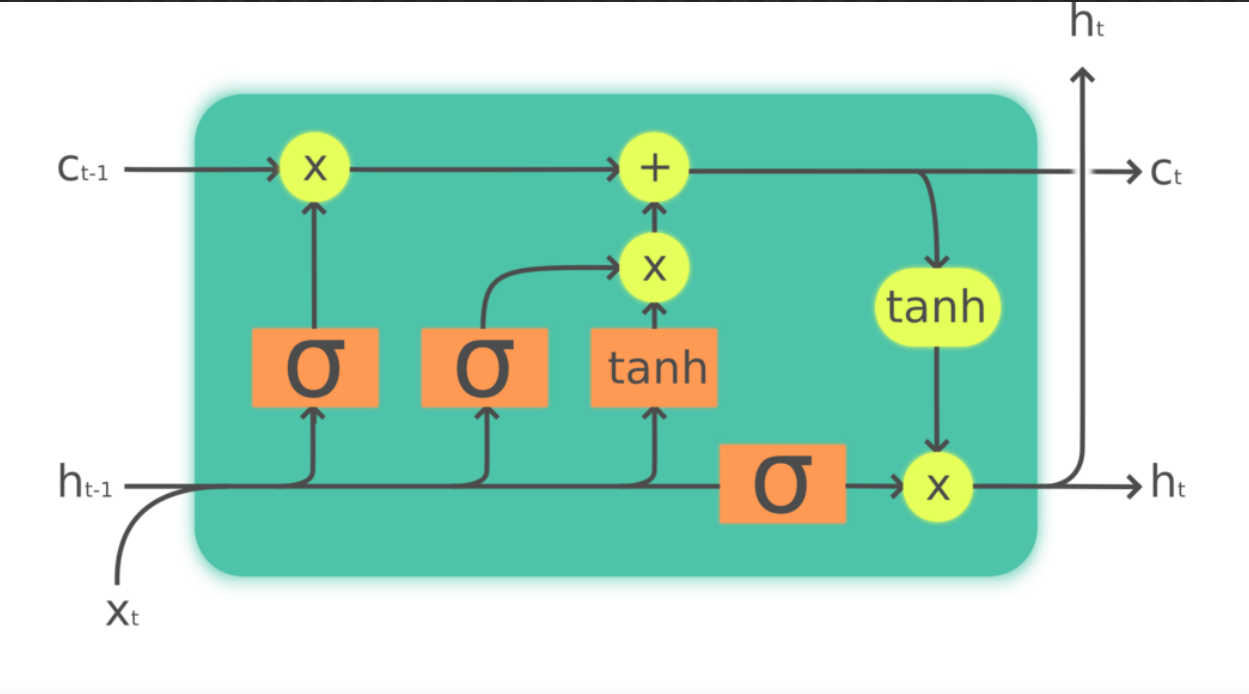

In [1]:
#Q2)문자열을 벡터를 이용한 모델을 생성해서 값을 리턴 받아 보자. 
import tensorflow as tf
import numpy as np
from  tensorflow.keras.utils import set_random_seed
from  tensorflow.keras.models  import *
from  tensorflow.keras.layers  import  * 

#2-1  문장 데이터를  변수에 저장 
input_array = np.array ([[0,   1 ,  2  , 3  , 4   ],  [ 5,   1 , 2  , 3 ,  6  ]])

#2-2 랜덤  속성값 설정
np.random.seed(1)
set_random_seed(2)

#2-3 모델 생성하기  
model  = Sequential()
model.add(Embedding(7,2))

#3. 컴파일  
model.compile('rmsprop' , loss ='mse')

#4. 리턴 

output_array = model.predict(input_array) 
print(output_array)
print(output_array.shape) # (2, 5, 2)




1/1 [==============================] - 0s 74ms/step
[[[ 0.02843983 -0.04518877]
  [ 0.01244213  0.02208966]
  [ 0.03567721  0.04178825]
  [ 0.04183492 -0.03163595]
  [-0.02534178 -0.01245432]]

 [[ 0.00433122 -0.04353247]
  [ 0.01244213  0.02208966]
  [ 0.03567721  0.04178825]
  [ 0.04183492 -0.03163595]
  [ 0.04732199  0.00539281]]]
(2, 5, 2)


In [2]:
#Q3)문자열을 [벡터 -> 평균차원 축소]를 이용한 모델을 생성해서 값을 리턴 받아 보자. 
import tensorflow as tf
import numpy as np
from  tensorflow.keras.utils import set_random_seed
from  tensorflow.keras.models  import *
from  tensorflow.keras.layers  import  * 

#2-1  문장 데이터를  변수에 저장 
input_array = np.array ([[0,   1 ,  2  , 3  , 4   ],  [ 5,   1 , 2  , 3 ,  6  ]])

#2-2 랜덤  속성값 설정
np.random.seed(1)
set_random_seed(2)

#2-3 모델 생성하기  
model  = Sequential()
model.add(Embedding(7,2))
model.add(GlobalAveragePooling1D())

#3. 컴파일  
model.compile('rmsprop' , loss ='mse')

#4. 리턴 

output_array = model.predict(input_array) 
print(output_array)

1/1 [==============================] - 0s 50ms/step
[[ 0.01861046 -0.00508023]
 [ 0.0283215  -0.00117954]]


In [3]:
#Q3)문자열을 [벡터 -> 평균차원 축소]를 이용한 모델을 생성해서 값을 리턴 받아 보자. 
import tensorflow as tf
import numpy as np
from  tensorflow.keras.utils import set_random_seed
from  tensorflow.keras.models  import *
from  tensorflow.keras.layers  import  * 

#2-1  문장 데이터를  변수에 저장 
input_array = np.array ([[0,   1 ,  2  , 3  , 4   ],  [ 5,   1 , 2  , 3 ,  6  ]])

#2-2 랜덤  속성값 설정
np.random.seed(1)
set_random_seed(2)

#2-3 모델 생성하기  
model  = Sequential()
model.add(Embedding(7,2))
model.add(GlobalAveragePooling1D())

#3. 컴파일  
model.compile('rmsprop' , loss ='mse')

#4. 리턴 

output_array = model.predict(input_array) 
print(output_array)

model.summary()

1/1 [==============================] - 0s 46ms/step
[[ 0.01861046 -0.00508023]
 [ 0.0283215  -0.00117954]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 2)           14        
                                                                 
 global_average_pooling1d_1  (None, 2)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Q4) LSTM 적용 해보자.    

import tensorflow as tf
import numpy as np
from  tensorflow.keras.utils import set_random_seed
from  tensorflow.keras.models  import *
from  tensorflow.keras.layers  import  * 

#2-1  문장 데이터를  변수에 저장 
input_array = np.array ([[0,   1 ,  2  , 3  , 4   ],  [ 5,   1 , 2  , 3 ,  6  ]])

x_train = input_array.reshape(input_array.shape[0], input_array.shape[1], 1)

y_train =np.array([7,8])

#2-2 랜덤  속성값 설정
np.random.seed(1)
set_random_seed(2)

#2-3 모델 생성하기   :  모델의 입력 정수 토큰한 시퀀스, 출력은 시퀀스 다음에 어휘사전에 등장할 수 있는 단어의 확률 
model  = Sequential()
model.add(Embedding(7,2))
#model.add(GlobalAveragePooling1D())
model.add(LSTM(3, activation='tanh')) 
model.add(Dense(1))
model.add(Activation('sigmoid'))

#2-3. 컴파일  
model.compile('rmsprop' , loss ='mse')

#2-4. 학습 
model.fit(x_train,y_train,
                      batch_size=3, 
                      epochs=50,                       
                      verbose=1)
#2-5. 리턴 
output_array = model.predict(x_train) 
print(output_array)

Epoch 1/50

1/1 [==============================] - 3s 3s/step - loss: 49.2413
Epoch 2/50
1/1 [==============================] - 0s 5ms/step - loss: 49.2074
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 49.1823
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 49.1607
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 49.1410
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 49.1226
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 49.1050
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 49.0881
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 49.0717
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 49.0556
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 49.0397
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 49.0241
Epoch 13/50
1/1 [==============================] - 0s 5ms/ste

In [5]:
# Q5) LSTM 적용 해보자.  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, RNN, GRU
from tensorflow.keras.layers import Dropout, Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [19]:
# 5-1. 데이터 로드 
df = pd.read_csv("./data/my_data.csv", sep=",")
no_of_lag = 3 

#5-2.특징량 작성을 위한 쉬프트 함수를 만들어결합  
df_lag_X = pd.DataFrame() 
for i in range(1, no_of_lag) :
    df_lag_X['x_rag{}'.format(i)] = df['기온'].shift(i)
    
df_lag_y= pd.DataFrame() 
for i in range(1, no_of_lag) :
    df_lag_y['y_rag{}'.format(i)] = df['습도'].shift(i)

#5-3조인
df_temp = pd.concat([df['기온'], df_lag_X], axis=1)
df_humi = pd.concat([df['습도'], df_lag_y], axis=1)

#5-4 Nan 값  처리  
df_temp.dropna(inplace=True)
df_humi.dropna(inplace=True)

#5-5 reshape로 일렬로 처리   _ 값만 배열로 리턴  
temp = np.array(df_temp).reshape(-1,no_of_lag )
humi = np.array(df_humi).reshape(-1,no_of_lag )

#5-6  [batch, timesteps, feature].
input_format=[]
_format1  =[] 

for j in range(0, len(temp)):
    for i in range(0,no_of_lag):
        _m  = ( [temp[j][i] , humi[j][i]])
        _format1.append(_m)
    input_format.append(_format1)
    _format1  =[]

input_format = np.array(input_format)    
print(input_format.shape)


#5-7  y 정답레벨 값 지정  
y= pd.concat([df['날씨']], axis=1)
y= y[no_of_lag-1: ]

#5-8 
train_X, test_X, train_y,test_y = train_test_split(input_format, y)
cb_e = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='auto')
cb_save = tf.keras.callbacks.ModelCheckpoint(filepath='mycheck02' , monitor='val_loss',
                                             save_weights_only=True)      

train_X = np.array(train_X)
train_y = np.array(train_y)

#5-9 모델 작성 
#LSTM의 모델 작성시 주의점  : 데이터의 순서가 새로운 시간의 데이터로 시작되기 때문에 (t , t-1, t-2),-> go_backwards 
input01 = Input(shape =(train_X.shape[1] ,train_X.shape[2])) 
lstm  = LSTM  (16,go_backwards =True )(input01)
drop01= Dropout(0.2)(lstm)
d1 = Dense(10)(drop01)
outputs = Dense(3)(d1)

model  = Model(inputs=input01 , outputs = outputs )
#5-10 컴파일
model.compile(loss='binary_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])  
#5-11 실행
history = model.fit(train_X,
                    train_y,
                    validation_split=0.1,
                    batch_size=5,
                    epochs=5,                    
                    callbacks=[cb_e, cb_save])
#5-12 예측 
pred_y = model.predict(test_X)
print(pred_y)

#5-13 텐서보드로 콜백함수 만들어서 분포도 확인 하기

(7, 3, 2)
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.4164 - accuracy: 0.7500 - val_loss: 0.9126 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 87ms/step - loss: 3.6014 - accuracy: 0.5000 - val_loss: 0.8747 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 91ms/step - loss: 2.8646 - accuracy: 0.5000 - val_loss: 0.8393 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 85ms/step - loss: 2.6669 - accuracy: 0.5000 - val_loss: 0.8068 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 1s 616ms/step
[[0.16315404 0.5136591  0.62557375]
 [0.22345144 0.4965474  0.69694287]]


In [7]:
temp

array([[10.,  6.,  4.],
       [12., 10.,  6.],
       [10., 12., 10.],
       [ 7., 10., 12.],
       [ 5.,  7., 10.],
       [ 5.,  5.,  7.],
       [ 4.,  5.,  5.]])

In [8]:
#Q6) LSTM을 사용한 다변량 데이터 학습  적용 해보자. 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [10]:
#6-1
df = pd.read_csv("./data/city_weather.csv")
df['date']   = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [11]:
#6-2
#데이터 세트를 작성하는 코드는 다음과 같습
# 조회 수
look_back=25
# 데이터 수
sample_size = len(df) - look_back
# 예측에 사용되는 기간
past_size = int(sample_size*0.8)
future_size = sample_size - past_size +1

In [12]:
# 데이터 세트를 만드는 함수
def make_dataset(raw_data, look_back=25):
    _X = []
    _y = []

    for i in range(len(raw_data) - look_back):
        _X.append(raw_data[i : i + look_back])
        _y.append(raw_data[i + look_back])
    _X = np.array(_X).reshape(len(_X), look_back, 1)
    _y = np.array(_y).reshape(len(_y), 1)

    return _X, _y

In [13]:
from sklearn import preprocessing

columns = list(df.columns)
del columns[0]

# 최소 0, 최대 1로 정규화
Xs = []
for i in range(len(columns)):
    Xs.append(preprocessing.minmax_scale(df[columns[i]])) #데이터의 최소값과 최대값 사이의 범위로 스케일링
Xs = np.array(Xs)

# 각 숫자 데이터 작성
X_tmpr, y_tmpr = make_dataset(Xs[0], look_back=look_back)
X_humid, y_humid = make_dataset(Xs[1], look_back=look_back)
X_dlh, y_dlh = make_dataset(Xs[2], look_back=look_back)
X_prec, y_prec = make_dataset(Xs[3], look_back=look_back)
X_cloud, y_cloud = make_dataset(Xs[4], look_back=look_back)

# 다변량 LSTM에 대응하기 위해 각 데이터를 결합
X_con = np.concatenate([X_tmpr, X_humid, X_dlh, X_prec, X_cloud], axis=2)


X = X_con
y=y_cloud

# 데이터를 과거 분 (훈련에 사용되는 분)과 미래 분 (미래 예측에 사용되는 분)으로 분할
X_past = X[:past_size]
X_future = X[past_size-1:]
y_past = y[:past_size]
y_future = y[past_size-1:]

# 훈련 데이터 정의
X_train = X_past
y_train=y_past

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# 모델 생성 함수
def create_LSTM_model():
    input = Input(shape=(np.array(X_train).shape[1], np.array(X_train).shape[2]))
    x = LSTM(64, return_sequences=True)(input)
    x = BatchNormalization()(x) #정규화
    x = LSTM(64)(x)
    output = Dense(1, activation='relu')(x)
    model = Model(input, output)
    return model

In [15]:
model = create_LSTM_model()
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25, 5)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 25, 64)            17920     
                                                                 
 batch_normalization (Batch  (None, 25, 64)            256       
 Normalization)                                                  
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51265 (200.25 KB)
Trainable params: 51137 (199.75 KB)
Non-trainable params: 128 (512.00 Byte)
_________________

7/7 [==============================] - 0s 17ms/step - loss: 0.0224
Epoch 190/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0222
Epoch 191/200
7/7 [==============================] - 0s 19ms/step - loss: 0.0229
Epoch 192/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0224
Epoch 193/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0225
Epoch 194/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0222
Epoch 195/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0226
Epoch 196/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0226
Epoch 197/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0226
Epoch 198/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0223
Epoch 199/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0225
Epoch 200/200
7/7 [==============================] - 0s 17ms/step - loss: 0.0215


In [16]:
predictions = model.predict(X_past)
future_predictions = model.predict(X_future)

4/4 [==============================] - 0s 6ms/step


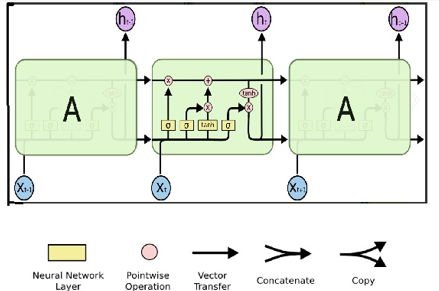

In [17]:
predictions

array([[0.68867964],
       [0.716476  ],
       [0.6280034 ],
       [0.5412843 ],
       [0.5258245 ],
       [0.6780545 ],
       [0.7617032 ],
       [0.7198786 ],
       [0.6736655 ],
       [0.6937129 ],
       [0.72747475],
       [0.71187764],
       [0.64485645],
       [0.6193777 ],
       [0.67413884],
       [0.65818274],
       [0.61767715],
       [0.62486875],
       [0.61830074],
       [0.58306724],
       [0.54563373],
       [0.5449779 ],
       [0.52070755],
       [0.42514816],
       [0.37050486],
       [0.32095158],
       [0.27575356],
       [0.25728333],
       [0.2333495 ],
       [0.25144938],
       [0.31410637],
       [0.3566105 ],
       [0.3155855 ],
       [0.38910455],
       [0.46922183],
       [0.5242263 ],
       [0.5837922 ],
       [0.607472  ],
       [0.5140794 ],
       [0.44408208],
       [0.39917773],
       [0.39851543],
       [0.47369945],
       [0.58784336],
       [0.6170841 ],
       [0.6105388 ],
       [0.6409483 ],
       [0.604

In [18]:
future_predictions

array([[0.08433992],
       [0.09954553],
       [0.147649  ],
       [0.2306283 ],
       [0.14908458],
       [0.231456  ],
       [0.30682164],
       [0.35546297],
       [0.38480115],
       [0.48268157],
       [0.58033997],
       [0.6240817 ],
       [0.7214406 ],
       [0.7339521 ],
       [0.76031077],
       [0.68790895],
       [0.6280456 ],
       [0.6224565 ],
       [0.62632793],
       [0.70354664],
       [0.7021999 ],
       [0.6776784 ],
       [0.70785224],
       [0.7112834 ],
       [0.70073533],
       [0.6659226 ],
       [0.6426986 ],
       [0.6445483 ],
       [0.65538365],
       [0.7471604 ],
       [0.86317617],
       [0.9425415 ],
       [0.96121866],
       [0.9682844 ],
       [0.978239  ],
       [0.92846316],
       [0.8914047 ],
       [0.8498263 ],
       [0.8216309 ],
       [0.7361669 ],
       [0.6775249 ],
       [0.57351226],
       [0.5004405 ],
       [0.4631232 ],
       [0.43795976],
       [0.34428492],
       [0.28221852],
       [0.224